<a href="https://colab.research.google.com/github/ssv112/911-calls-project---Kaggle/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [14]:
X_train=X_train/255
X_test=X_test/255

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_c_test=to_categorical(y_test,10)
y_c_train=to_categorical(y_train,10)

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D,Flatten

In [36]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
          

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop= EarlyStopping(patience=1)

In [40]:
model.fit(x=X_train,
    y=y_c_train,
    epochs=15,
    verbose=1,
    callbacks=[early_stop],
    validation_data=(X_test,y_c_test))

Epoch 1/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4799 - accuracy: 0.4633 - val_loss: 1.2462 - val_accuracy: 0.5562
Epoch 2/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1512 - accuracy: 0.5913 - val_loss: 1.1412 - val_accuracy: 0.5953
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0019 - accuracy: 0.6484 - val_loss: 1.0042 - val_accuracy: 0.6536
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9023 - accuracy: 0.6873 - val_loss: 0.9994 - val_accuracy: 0.6508
Epoch 5/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8064 - accuracy: 0.7184 - val_loss: 0.9593 - val_accuracy: 0.6682
Epoch 6/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7296 - accuracy: 0.7438 - val_loss: 0.9800 - val_accuracy: 0.6686


In [31]:
X_train.shape

(50000, 32, 32, 3)

In [41]:
metrics= pd.DataFrame(model.history.history)

In [43]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

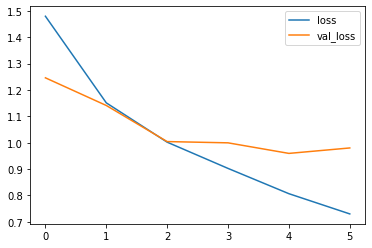

In [44]:
metrics[['loss','val_loss']].plot()

In [45]:
model.evaluate(X_test,y_c_test,verbose=0)

[0.9799792766571045, 0.6686000227928162]

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1000
           1       0.73      0.82      0.77      1000
           2       0.59      0.57      0.58      1000
           3       0.44      0.58      0.50      1000
           4       0.69      0.55      0.61      1000
           5       0.64      0.50      0.56      1000
           6       0.71      0.77      0.74      1000
           7       0.81      0.66      0.73      1000
           8       0.75      0.79      0.77      1000
           9       0.79      0.69      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [51]:
print(confusion_matrix(y_test,predictions))

[[768  37  42  17  11   2   9   5  83  26]
 [ 31 825   7  11   3   1  13   0  45  64]
 [ 90  15 567 104  51  51  69  20  22  11]
 [ 37  20  78 578  55 101  66  26  24  15]
 [ 40  12  90  97 549  35  89  60  22   6]
 [ 31   9  69 277  37 498  30  32  10   7]
 [ 15  13  47  86  31  18 768   8  10   4]
 [ 33  12  43  92  54  59  15 662   5  25]
 [101  40  11  25   4   3   6   2 786  22]
 [ 52 148  15  24   4   6  13   6  47 685]]


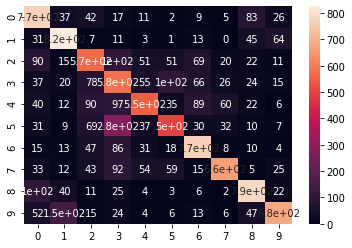

In [52]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [60]:
my_image= X_test[16]

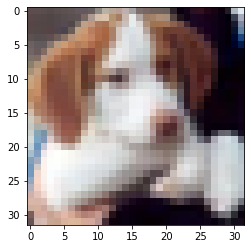

In [61]:
plt.imshow(my_image)

In [62]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])

In [63]:
y_test[16]

array([5], dtype=uint8)